# 真正的图像增强扩充数据集调优

之前的图像处理主要是做了图像的裁剪和平移，这两个操作对于训练来讲可以说是必需的，否则数据集的质量就太差了，如前工作，网络已经可以正常训练工作了，但精度只有80%左右（validate_main2.py)，现在做一些真正的数据增强操作，包括旋转，缩放等（当然还是局限于GG-CNN范围内，，把这块工作做完的话，后面就真正开始自己独立的内容添加了。

这部分内容的修改主要围绕几个图像类，抓取类以及数据集类来实现，具体操作就是在抓取类和图像类里面添加可以实现旋转缩放的函数功能，然后在数据集载入类里面调用这些功能实现效果。

开整！

## 1.对图像类功能的添加

### 1.1 Image 类
先直接照搬原先的image_pro内容

In [2]:
from imageio import imread

from skimage.transform import resize

In [3]:
#这是添加数据增强之前的
class Image:
    '''定义一个图像类，主要功能是将原始的图像输入转化为适合网络训练的格式并根据图像处理需求完成一些其他功能'''
    def __init__(self,img):
        '''
        :功能 :类初始化函数
        :参数 :ndarray,原始图像
        '''
        self.img = img
    
    @classmethod
    def from_file(cls,file_path):
        '''
        :功能           : 从原始图片的路径对其进行载入
        :参数 file_path : str,原始图像所在的路径
        :返回 class     : 由指定路径的原始图片实例化的Image类
        :备注           : 这里用到的cls方法要学习一下
        '''
        return cls(imread(file_path))
    
    def img_format(self):
        '''
        :功能 :将原始图像转换为指定格式
        '''
        pass
    
    def normalize(self):
        '''
        :功能 :将图像像素值标准化至[0,1]范围
        '''
        self.img = self.img.astype('float32')/255.0
        self.img = self.img-self.img.mean()
        
    def crop(self,top_left, bottom_right):
        '''
        :功能              :按照给定参数对图像进行裁剪操作
        :参数 top_left     :ndarray,要裁剪区域的左上角点坐标
        :参数 bottom_right :ndarray,要裁剪区域的右下角点坐标
        '''
        self.img = self.img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    def resize(self,shape):
        '''
        :功能           :将图片resize成指定的shape
        :参数 shape     :ndarray,要裁剪区域的左上角点坐标
        '''
        if self.img.shape == shape:
            return
        self.img = resize(self.img, shape, preserve_range=True).astype(self.img.dtype)

In [4]:
from skimage.transform import rotate, resize
class Image:
    '''定义一个图像类，主要功能是将原始的图像输入转化为适合网络训练的格式并根据图像处理需求完成一些其他功能'''
    def __init__(self,img):
        '''
        :功能 :类初始化函数
        :参数 :ndarray,原始图像
        '''
        self.img = img
    
    @classmethod
    def from_file(cls,file_path):
        '''
        :功能           : 从原始图片的路径对其进行载入
        :参数 file_path : str,原始图像所在的路径
        :返回 class     : 由指定路径的原始图片实例化的Image类
        :备注           : 这里用到的cls方法要学习一下
        '''
        return cls(imread(file_path))
    
    def img_format(self):
        '''
        :功能 :将原始图像转换为指定格式
        '''
        pass
    
    def normalize(self):
        '''
        :功能 :将图像像素值标准化至[0,1]范围
        '''
        self.img = self.img.astype('float32')/255.0
        self.img = self.img-self.img.mean()
        
    def crop(self,top_left, bottom_right):
        '''
        :功能              :按照给定参数对图像进行裁剪操作
        :参数 top_left     :ndarray,要裁剪区域的左上角点坐标
        :参数 bottom_right :ndarray,要裁剪区域的右下角点坐标
        '''
        self.img = self.img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    def resize(self,shape):
        '''
        :功能           :将图片resize成指定的shape
        :参数 shape     :ndarray,要裁剪区域的左上角点坐标
        '''
        if self.img.shape == shape:
            return
        self.img = resize(self.img, shape, preserve_range=True).astype(self.img.dtype)
    
    def rotate(self,angle,center = None):
        '''
        :功能           :将图片绕指定中心旋转指定角度
        :参数 angle     :要旋转的角度（弧度制）
        :参数 center    :旋转中心像素坐标，如不指定则默认为图像中心像素坐标
        '''
        if center is not None:
            center = (center[0],center[1])#不管你原来什么数据类型，这里都变成tuple
        self.img = rotate(self.img,angle/np.pi*180,center = center,mode = 'symmetric',preserve_range = True).astype(self.img.dtype)

这就定义完了旋转的函数，按照我这么谨慎的性格，应该写一个测试一个，干。

In [7]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

cornell_path = "../cornell"
graspf = glob.glob(os.path.join(cornell_path,'*','pcd*cpos.txt'))
graspf.sort()

rgbf = [filename.replace('cpos.txt','r.png') for filename in graspf]
depthf = [filename.replace('cpos.txt','d.tiff') for filename in graspf]

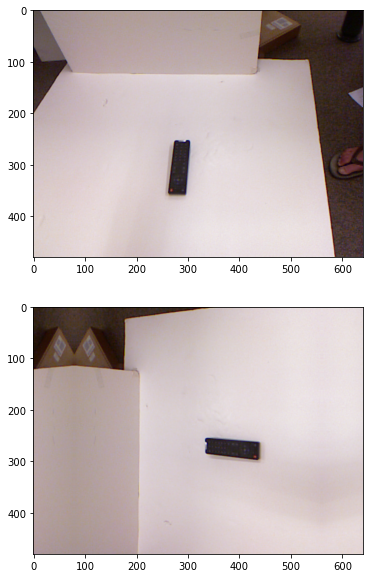

In [16]:
img = Image.from_file(rgbf[0])

plt.figure(figsize = (10,10))

plt.subplot(211)
plt.imshow(img.img)
plt.subplot(212)
img.rotate(1.57)
plt.imshow(img.img)
plt.show()